In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf
from datetime import datetime

# Importing the dataset

In [2]:
# Set the ticker symbol for Bank Nifty
ticker = "AMZN"

# Download the data from Yahoo Finance for a specific date range
data = yf.download(ticker, start="2015-01-01", end=datetime.today())

[*********************100%***********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,15.629000,15.737500,15.348000,15.426000,15.426000,55664000
2015-01-05,15.350500,15.419000,15.042500,15.109500,15.109500,55484000
2015-01-06,15.112000,15.150000,14.619000,14.764500,14.764500,70380000
2015-01-07,14.875000,15.064000,14.766500,14.921000,14.921000,52806000
2015-01-08,15.016000,15.157000,14.805500,15.023000,15.023000,61768000
...,...,...,...,...,...,...
2023-05-08,105.040001,106.099998,104.699997,105.830002,105.830002,49430900
2023-05-09,105.480003,106.790001,105.160004,106.620003,106.620003,44089400
2023-05-10,108.099998,110.669998,108.050003,110.190002,110.190002,78627600


# Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2105 entries, 2015-01-02 to 2023-05-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2105 non-null   float64
 1   High       2105 non-null   float64
 2   Low        2105 non-null   float64
 3   Close      2105 non-null   float64
 4   Adj Close  2105 non-null   float64
 5   Volume     2105 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 115.1 KB


In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,15.6290,15.7375,15.3480,15.4260,15.4260,55664000
2015-01-05,15.3505,15.4190,15.0425,15.1095,15.1095,55484000
2015-01-06,15.1120,15.1500,14.6190,14.7645,14.7645,70380000
2015-01-07,14.8750,15.0640,14.7665,14.9210,14.9210,52806000
2015-01-08,15.0160,15.1570,14.8055,15.0230,15.0230,61768000


In [6]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-08,105.040001,106.099998,104.699997,105.830002,105.830002,49430900
2023-05-09,105.480003,106.790001,105.160004,106.620003,106.620003,44089400
2023-05-10,108.099998,110.669998,108.050003,110.190002,110.190002,78627600
2023-05-11,111.029999,113.279999,110.489998,112.180000,112.180000,74830600
2023-05-12,112.160004,112.639999,110.559998,110.579903,110.579903,16756427


In [7]:
data.shape

(2105, 6)

In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2.105000e+03
mean,88.804274,89.837012,87.662005,88.765236,88.765236,8.198866e+07
std,48.989509,49.606379,48.302730,48.934124,48.934124,4.120050e+07
min,14.314000,14.539500,14.262500,14.347500,14.347500,1.675643e+07
25%,41.849998,42.124500,41.572498,41.865501,41.865501,5.561600e+07
50%,88.473000,89.311996,87.361504,88.286499,88.286499,7.057000e+07
75%,122.900002,124.400002,121.260002,123.529999,123.529999,9.545800e+07
max,187.199997,188.654007,184.839493,186.570496,186.570496,4.771220e+08


# Missing values

In [9]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
import plotly.express as px
import matplotlib.pyplot as plt

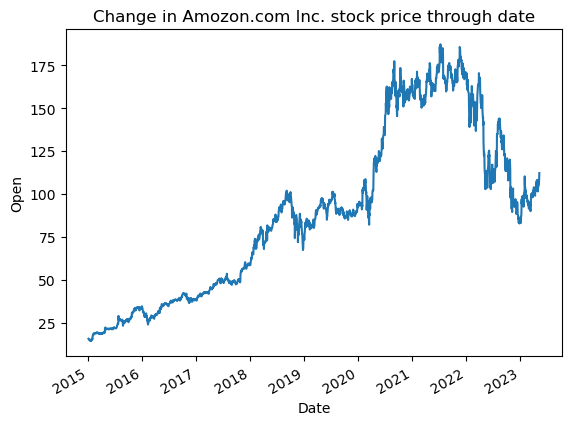

In [11]:

# plot price of gold for each increasing day
data["Open"].plot()
plt.title("Change in Amozon.com lnc. stock price through date")
plt.xlabel("Date")
plt.ylabel("Open")
plt.show()

# Splitting X and Y into taining and testing varaibles

In [12]:
X=data[['Open','High','Low']]
y=data['Close']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [14]:
X_train.shape,X_test.shape


((1578, 3), (527, 3))

In [15]:
y_train.shape,y_test.shape

((1578,), (527,))

# Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [17]:
regressor = RandomForestRegressor(n_estimators=100)

In [18]:
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [19]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [20]:
print(test_data_prediction)

[ 89.62065651  94.22661949 128.61205963  58.53486534 155.70898285
 119.8419503   84.58334656 171.42095245  77.37869987 159.3405658
  99.03042015  79.46389992 168.74622971 173.72033234 165.11048523
  69.7772612   33.71042042 140.76960983 102.73919861 106.56896454
  93.28601334  33.21677944  93.73317909 133.72296494  86.86821091
  86.47638535  77.38568008  28.12776049 120.56034615  79.90053246
 184.2970134   97.08591797 150.15710358 174.87279221 118.87375473
  81.98606003  86.75650543  26.25621471 148.97210205  40.89173477
  37.98133423 139.79658081  18.61138517 151.61535324  24.39487988
  38.79889076  42.33823051  18.60117529  38.34659473  71.3725351
  88.87641083  48.98710945  85.90350471  36.8212352   88.48819405
  38.62556     91.51732895 112.03937172 158.52174408  27.73764505
  93.13001518 164.41922943  95.50855431  78.74725098  87.55856903
  82.17489479  31.05169506  32.81192501 165.19831543  35.1928997
  87.15629585  48.75157578  88.57722893  84.57179962 170.12121323
 114.26532143

In [21]:
# R squared errorY
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9995342287170349


In [22]:
y_test=list(y_test)

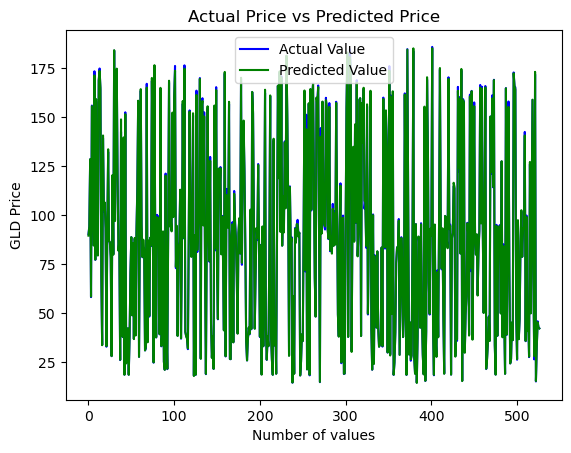

In [23]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

# Training the model using linear regression

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model=LinearRegression()


In [26]:
model.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)

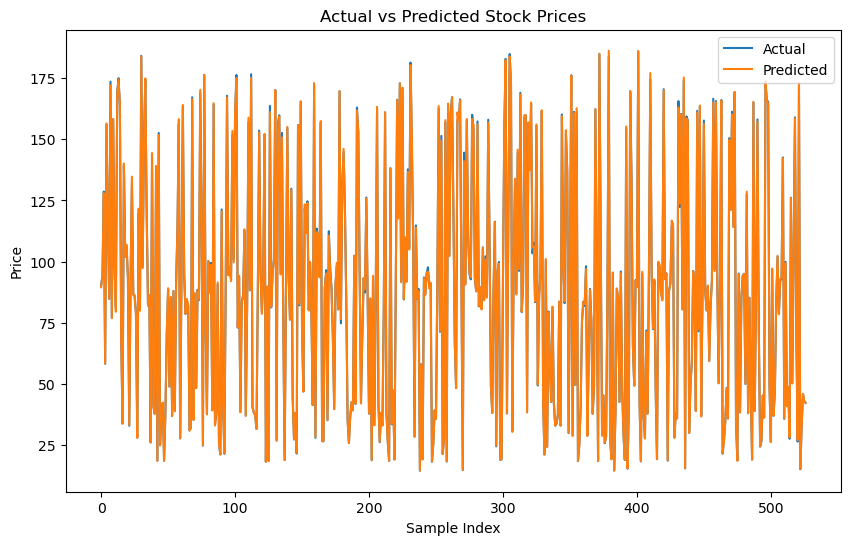

In [28]:
# Visualize the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()

In [29]:
reg=LinearRegression()
reg.fit(X,y)

LinearRegression()

In [30]:
prediction=reg.predict(X)

In [31]:
prediction

array([ 15.54978511,  15.21583162,  14.80309286, ..., 110.22963472,
       112.49228042, 111.26678377])

In [32]:
Open=float(input("enter a value"))
High=float(input("enter a value"))
Low=float(input("enter a value"))

data = np.array([[Open,High,Low]])
pred_value = model.predict(data)[0]

print(pred_value)

enter a value767
enter a value324
enter a value232
-36.86465467696955


C:\Users\reham\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [34]:
import pickle
file=open("AMZN_model.pkl",'wb')
pickle.dump(model,file)